In [1]:
import os
os.getcwd()

'/home/jupyter'

In [2]:
# Clone the tensorflow models repository from GitHub
!pip uninstall Cython -y # Temporary fix for "No module named 'object_detection'" error
!git clone --depth 1 https://github.com/tensorflow/models

Found existing installation: Cython 0.29.35
Uninstalling Cython-0.29.35:
  Successfully uninstalled Cython-0.29.35
Cloning into 'models'...
remote: Enumerating objects: 4065, done.
remote: Counting objects: 100% (4065/4065), done.
remote: Compressing objects: 100% (3088/3088), done.
remote: Total 4065 (delta 1186), reused 1945 (delta 917), pack-reused 0
Receiving objects: 100% (4065/4065), 54.71 MiB | 40.78 MiB/s, done.
Resolving deltas: 100% (1186/1186), done.


In [12]:
# Copy setup files into models/research folder
!cd /home/jupyter/models/research/ && \
protoc object_detection/protos/*.proto --python_out=. && \
cp object_detection/packages/tf2/setup.py .

In [14]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('/home/jupyter/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/home/jupyter/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [15]:
# Install the Object Detection API
# Need to do a temporary fix with PyYAML because Colab isn't able to install PyYAML v5.4.1
!pip install pyyaml==5.3
!pip install /home/jupyter/models/research/

# Need to downgrade to TF v2.8.0 due to Colab compatibility bug with TF v2.10 (as of 10/03/22)
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.3-cp37-cp37m-linux_x86_64.whl size=44244 sha256=bd3cb800168be1df50fa1b4d90942483f2fe5f3cf42c9753abf797eb9b30a764
  Stored in directory: /home/jupyter/.cache/pip/wheels/8a/55/a4/c0a81d27c33462cfdcb904db018f5550197e88b2b6b85beed2
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kubernetes 26.1.0 requires pyyaml>=5.4.1, but you have pyyaml 5.3 which is incompatible.
Processing ./models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 

In [17]:
# Run Model Bulider Test file, just to verify everything's working properly
!python /home/jupyter/models/research/object_detection/builders/model_builder_tf2_test.py

2023-11-28 11:48:50.529556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-28 11:48:50.529592: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-28 11:48:50.529615: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edival-managed-notebooks): /proc/driver/nvidia/version does not exist
Running tests under Python 3.7.12: /opt/conda/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-11-28 11:48:50.534997: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-crit

In [19]:
!gsutil cp gs://edival-402305-bucket/dataset/FreshandRottenFoods.zip /home/jupyter/

Copying gs://edival-402305-bucket/dataset/FreshandRottenFoods.zip...
\ [1 files][ 56.3 MiB/ 56.3 MiB]                                                
Operation completed over 1 objects/56.3 MiB.                                     


In [32]:
!mkdir /home/jupyter/images
!unzip -q FreshandRottenFoods.zip -d /home/jupyter/images/all
!mkdir /home/jupyter/images/train; mkdir /home/jupyter/images/validation; mkdir /home/jupyter/images/test

In [33]:
 !wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/train_val_test_split.py
!python train_val_test_split.py

Total images: 2887
Images moving to train: 2309
Images moving to validation: 288
Images moving to test: 290


In [51]:
### This creates a a "labelmap.txt" file with a list of classes the object detection model will detect.
file_content = """
FreshApple
FreshBanana
FreshCabbage
FreshBanana
FreshCarrot
FreshMeat
FreshOrange
FreshStrawberry
null
RottenStrawberry
RottenApple
RottenBanana
RottenCabbage
RottenCarrot
RottenMeat
RottenOrange
"""

file_path = '/home/jupyter/labelmap.txt'

with open(file_path, 'w') as file:
    file.write(file_content)


In [34]:
# Download data conversion scripts
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py

--2023-11-28 12:19:32--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1348 (1.3K) [text/plain]
Saving to: ‘create_csv.py’

create_csv.py       100%[===================>]   1.32K  --.-KB/s    in 0s      

2023-11-28 12:19:32 (128 MB/s) - ‘create_csv.py’ saved [1348/1348]

--2023-11-28 12:19:32--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.github

In [52]:
# Create CSV data files and TFRecord files
!python3 create_csv.py
!python3 create_tfrecord.py --csv_input=images/train_labels.csv --labelmap=labelmap.txt --image_dir=images/train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=images/validation_labels.csv --labelmap=labelmap.txt --image_dir=images/validation --output_path=val.tfrecord

Successfully converted xml to csv.
Successfully converted xml to csv.
2023-11-28 12:54:13.432362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-28 12:54:13.432401: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-28 12:54:13.432424: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edival-managed-notebooks): /proc/driver/nvidia/version does not exist
Successfully created the TFRecords: /home/jupyter/train.tfrecord
2023-11-28 12:54:17.346906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or

In [58]:
train_record_fname = '/home/jupyter/train.tfrecord'
val_record_fname = '/home/jupyter/val.tfrecord'
label_map_pbtxt_fname = '/home/jupyter/labelmap.pbtxt'

In [54]:
# Change the chosen_model variable to deploy different models available in the TF2 object detection zoo
chosen_model = 'ssd-mobilenet-v2-fpnlite-320'

MODELS_CONFIG = {
    'ssd-mobilenet-v2': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz',
    },
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
    },
    'ssd-mobilenet-v2-fpnlite-320': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
    },
}

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

In [55]:
# Create "mymodel" folder for holding pre-trained weights and configuration files
!mkdir /home/jupyter/models/mymodel/
!cd /home/jupyter/models/mymodel/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file for model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

--2023-11-28 12:56:15--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.183.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2023-11-28 12:56:15 (167 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2023-11-28 12:56:15--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111

In [56]:
# Set training parameters for the model
num_steps = 40000

if chosen_model == 'efficientdet-d0':
  batch_size = 4
else:
  batch_size = 16

In [59]:
# Set file locations and get number of classes for config file
pipeline_fname = '/home/jupyter/models/mymodel/' + base_pipeline_file
fine_tune_checkpoint = '/home/jupyter/models/mymodel/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)

Total classes: 17


In [61]:
# Create custom configuration file by writing the dataset, model checkpoint, and training parameters into the base pipeline file
import re

%cd /home/jupyter/models/mymodel
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:

    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)

    # Set tfrecord files for train and test datasets
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)

    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)

    # If using ssd-mobilenet-v2, reduce learning rate (because it's too high in the default config file)
    if chosen_model == 'ssd-mobilenet-v2':
      s = re.sub('learning_rate_base: .8',
                 'learning_rate_base: .08', s)

      s = re.sub('warmup_learning_rate: 0.13333',
                 'warmup_learning_rate: .026666', s)

    # If using efficientdet-d0, use fixed_shape_resizer instead of keep_aspect_ratio_resizer (because it isn't supported by TFLite)
    if chosen_model == 'efficientdet-d0':
      s = re.sub('keep_aspect_ratio_resizer', 'fixed_shape_resizer', s)
      s = re.sub('pad_to_max_dimension: true', '', s)
      s = re.sub('min_dimension', 'height', s)
      s = re.sub('max_dimension', 'width', s)

    f.write(s)


/home/jupyter/models/mymodel
writing custom configuration file


In [62]:
# (Optional) Display the custom configuration file's contents
!cat /home/jupyter/models/mymodel/pipeline_file.config

# SSD with Mobilenet v2 FPN-lite (go/fpn-lite) feature extractor, shared box
# predictor and focal loss (a mobile version of Retinanet).
# Retinanet: see Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from Imagenet classification checkpoint
# Train on TPU-8
#
# Achieves 22.2 mAP on COCO17 Val

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 17
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      multiscale_anchor_generator 

In [63]:
# Set the path to the custom config file and the directory to store training checkpoints in
pipeline_file = '/home/jupyter/models/mymodel/pipeline_file.config'
model_dir = '/home/jupyter/training/'

In [104]:
%load_ext tensorboard
%tensorboard --logdir '/home/jupyter/training/train'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2799), started 1 day, 0:10:55 ago. (Use '!kill 2799' to kill it.)

In [101]:
# Run training!
!python /home/jupyter/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/opt/conda/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
2023-11-29 07:22:38.918537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/..

In [102]:
# Make a directory to store the trained TFLite model
!mkdir /home/jupyter/custom_model_lite
output_directory = '/home/jupyter/custom_model_lite'

# Path to training directory (the conversion script automatically chooses the highest checkpoint file)
last_model_path = '/home/jupyter/training'

!python /home/jupyter/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

mkdir: cannot create directory ‘/home/jupyter/custom_model_lite’: File exists
2023-11-29 16:23:48.531527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-29 16:23:48.531566: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-29 16:23:48.531590: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edival-managed-notebooks): /proc/driver/nvidia/version does not exist
2023-11-29 16:23:48.537018: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perf

In [103]:
# Convert exported graph file into TFLite model file
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/home/jupyter/custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('/home/jupyter/custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)

2023-11-29 16:29:46.665017: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-11-29 16:29:46.665070: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-11-29 16:29:46.665302: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /home/jupyter/custom_model_lite/saved_model
2023-11-29 16:29:46.721491: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-11-29 16:29:46.721534: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /home/jupyter/custom_model_lite/saved_model
2023-11-29 16:29:46.889525: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-11-29 16:29:47.703823: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /home/jupyter/custom_model_lite/saved_model
2023-11-29 16:29:48.156383: I tensorflow/cc/saved_model/loa

In [105]:
# Script to run custom TFLite model on test images to detect objects
# Source: https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/TFLite_detection_image.py

# Import packages
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Define function for inferencing with TFLite model and displaying results

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf=0.5, num_test_images=10, savepath='/home/jupyter/results', txt_only=False):

  # Grab filenames of all images in test folder
  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp')

  # Load the label map into memory
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model into memory
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0] # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0] # Confidence of detected objects

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))

              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])


      # All the results have been drawn on the image, now display the image
      if txt_only == False: # "text_only" controls whether we want to display the image results or just save them in .txt files
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(3,4))
        plt.imshow(image)
        plt.show()

      # Save detection results in .txt files (for calculating mAP)
      elif txt_only == True:

        # Get filenames and paths
        image_fn = os.path.basename(image_path)
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        # Write results to text file
        # (Using format defined by https://github.com/Cartucho/mAP, which will make it easy to calculate mAP)
        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

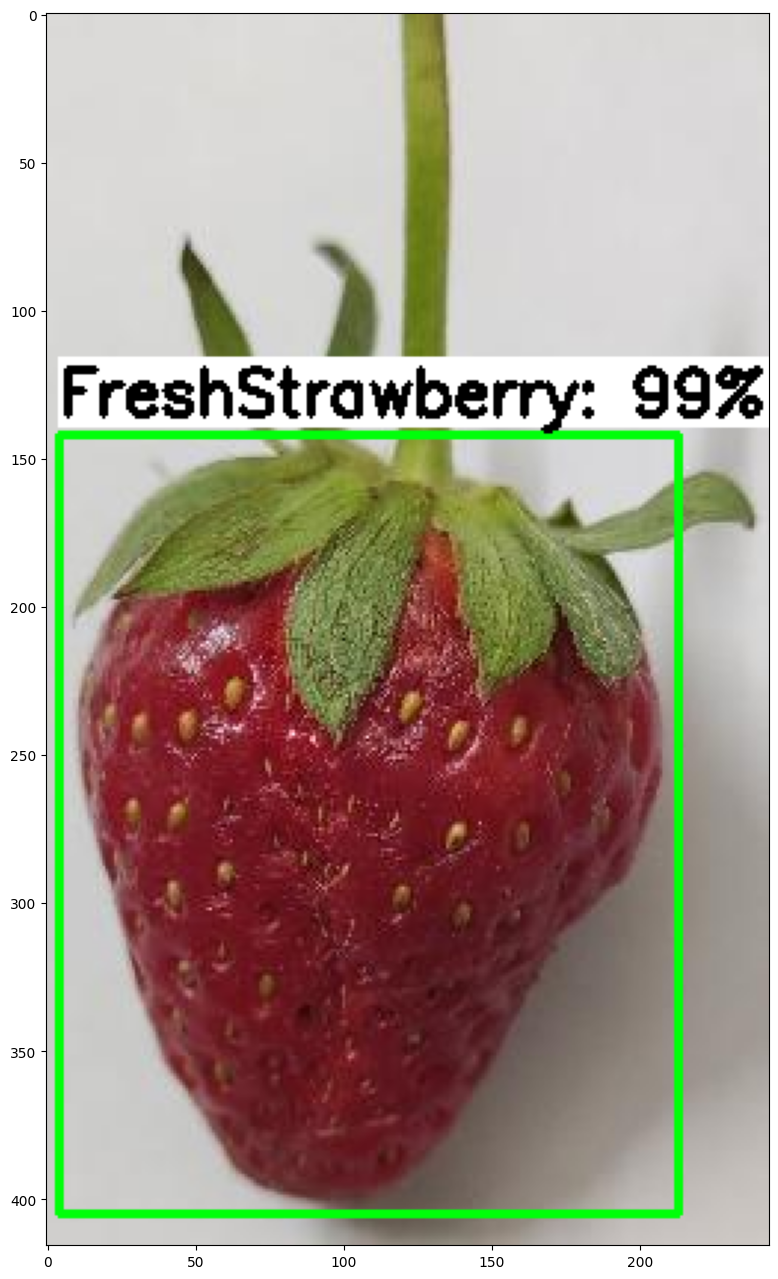

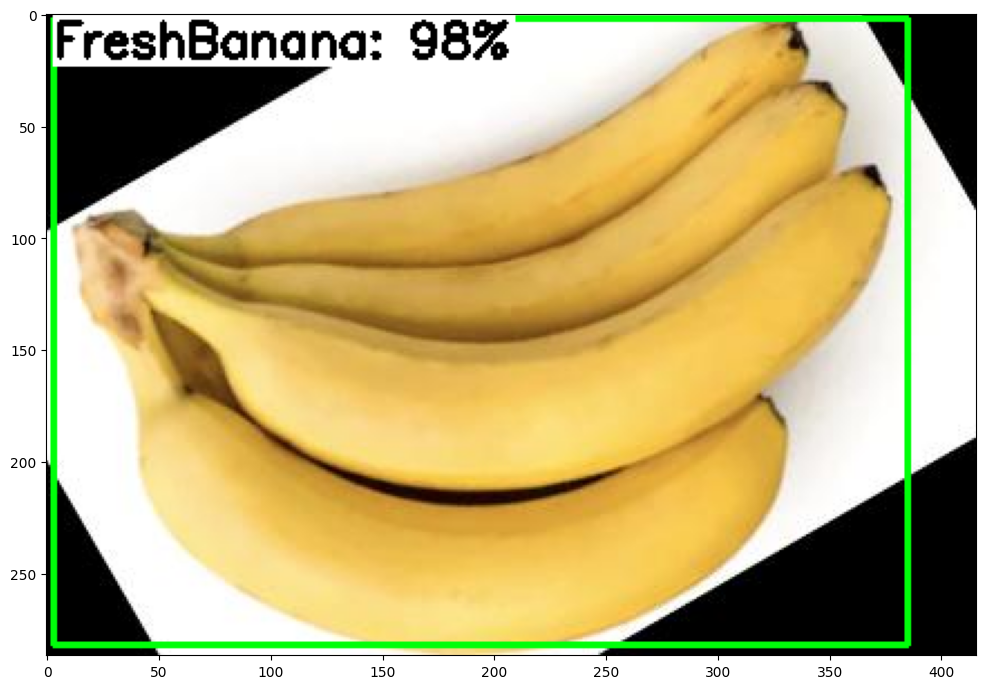

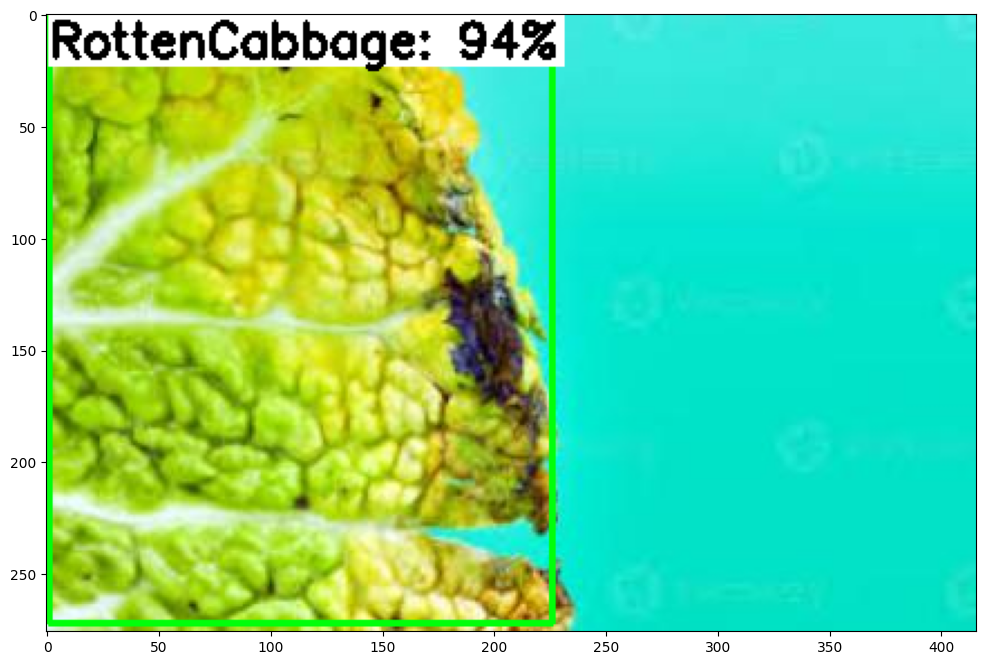

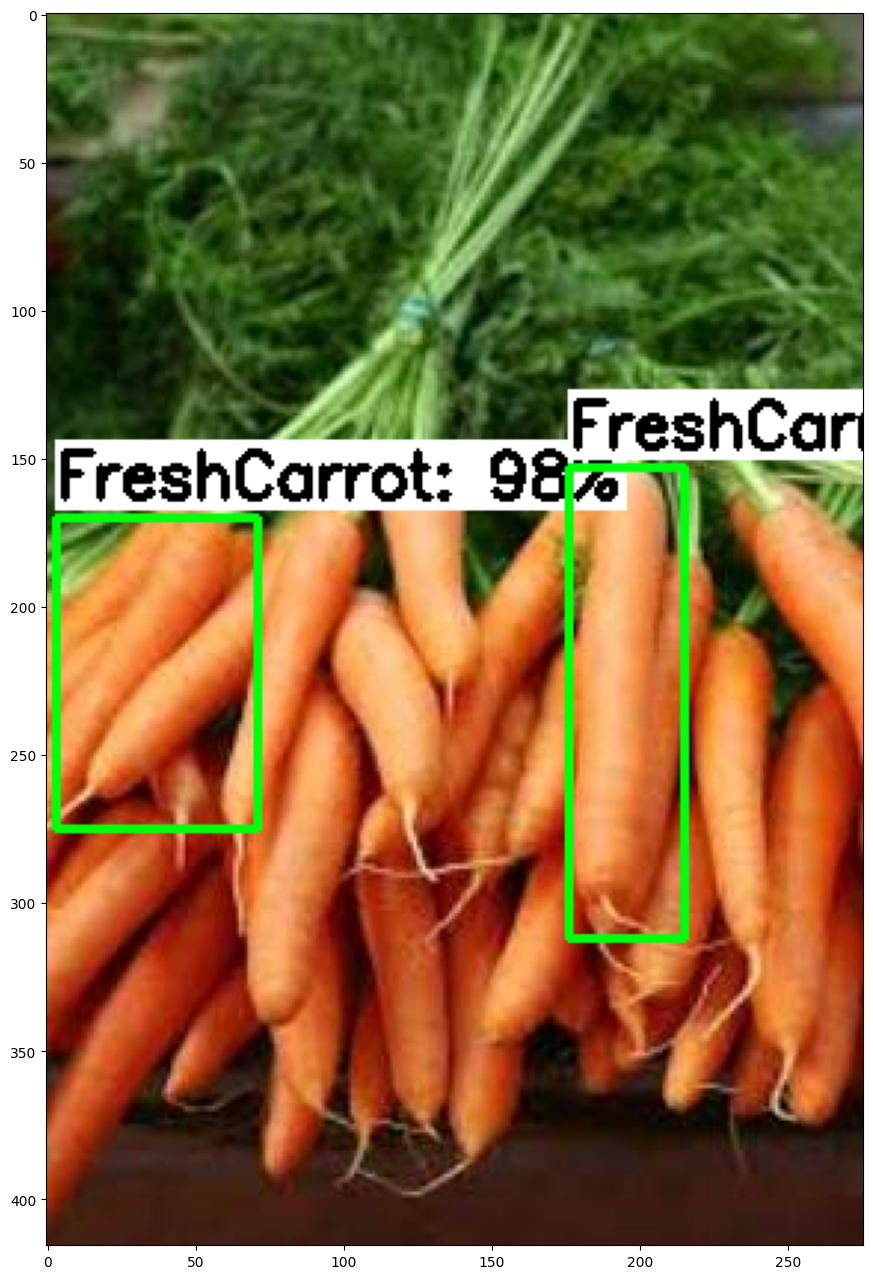

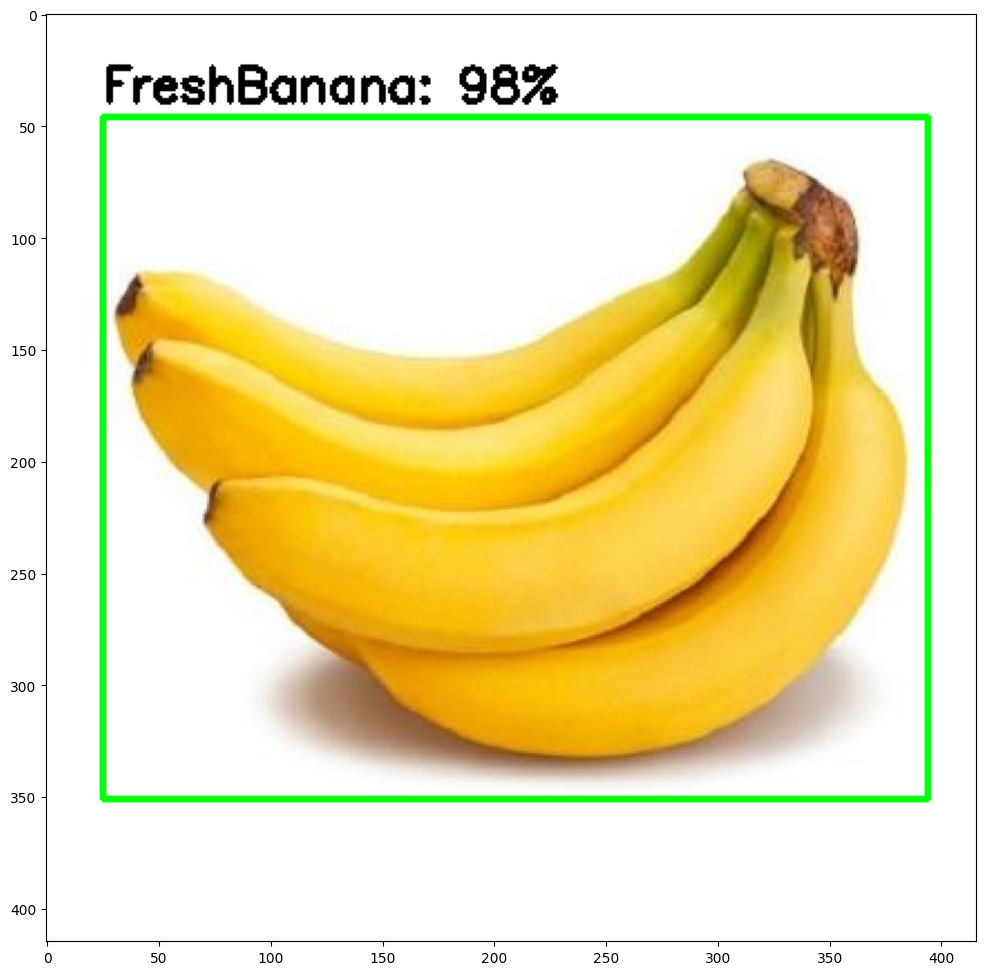

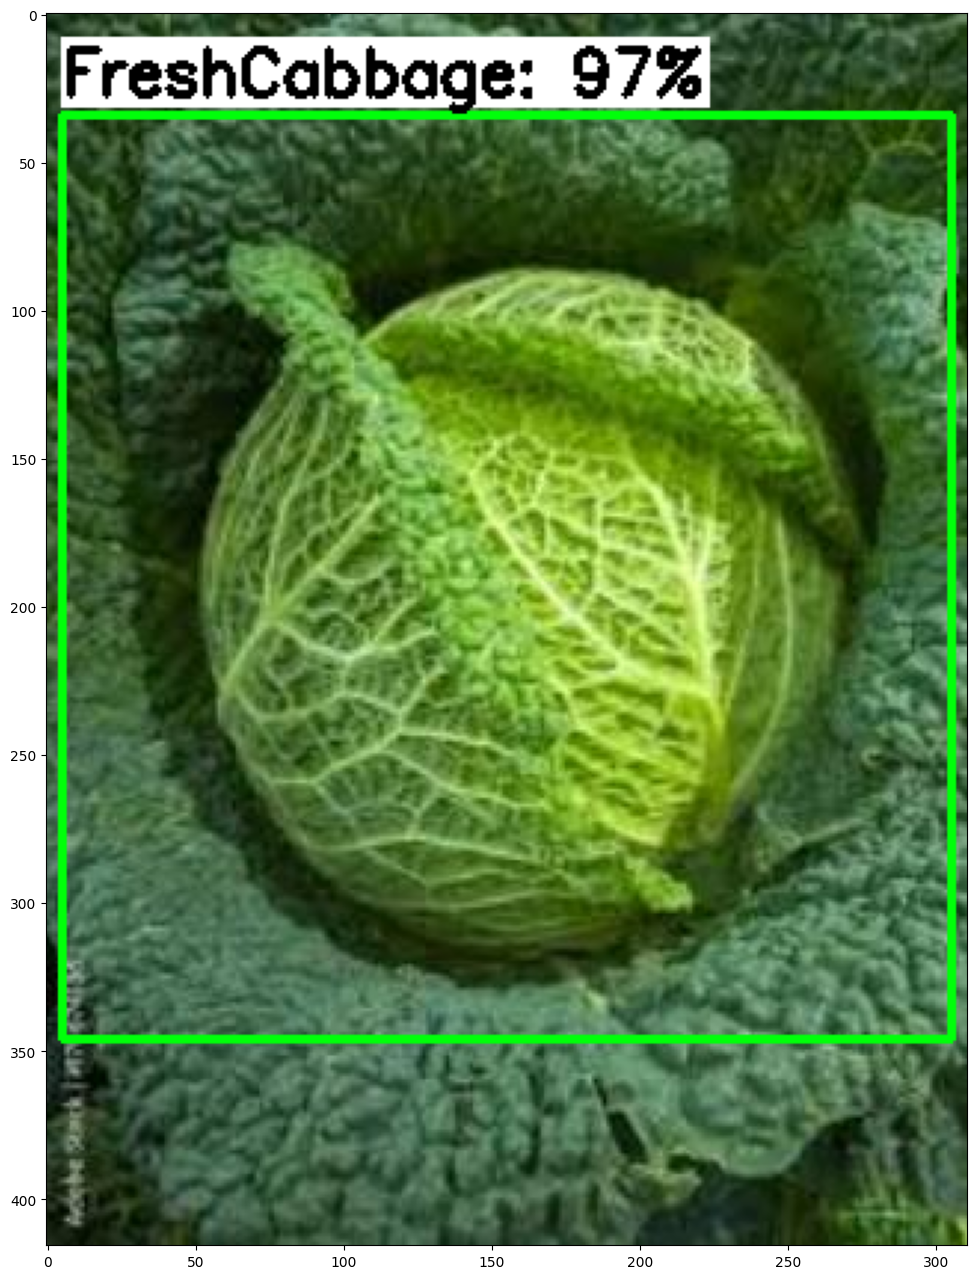

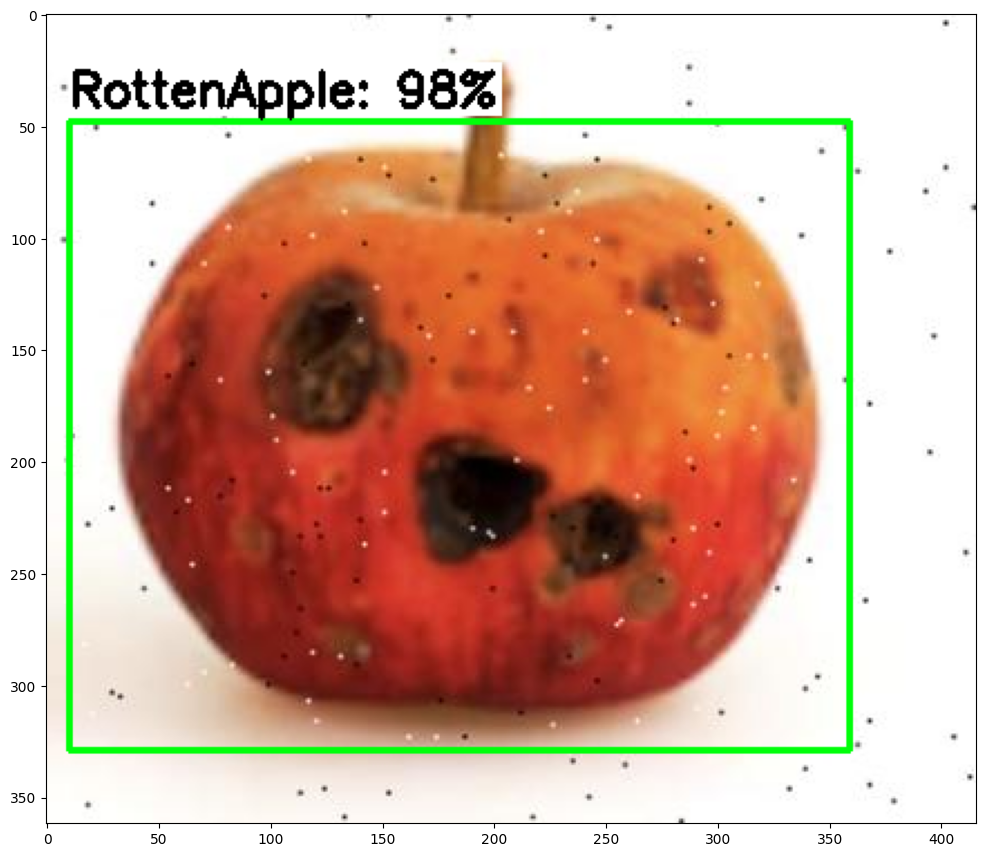

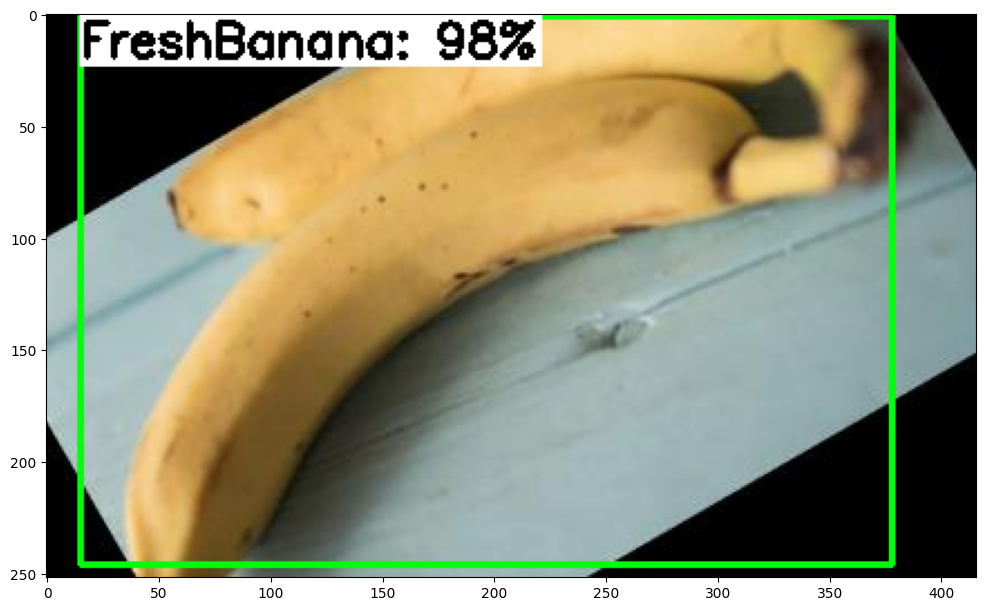

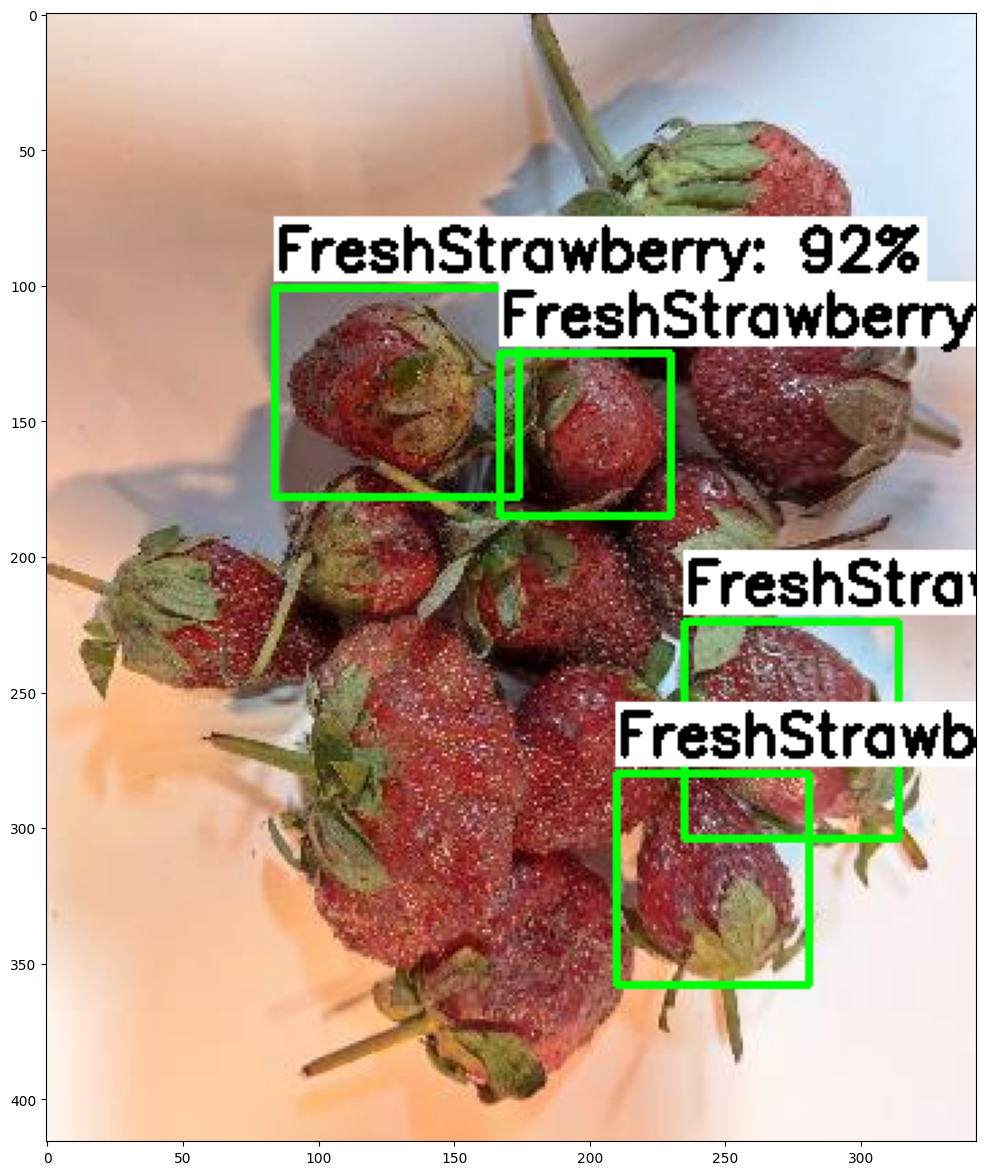

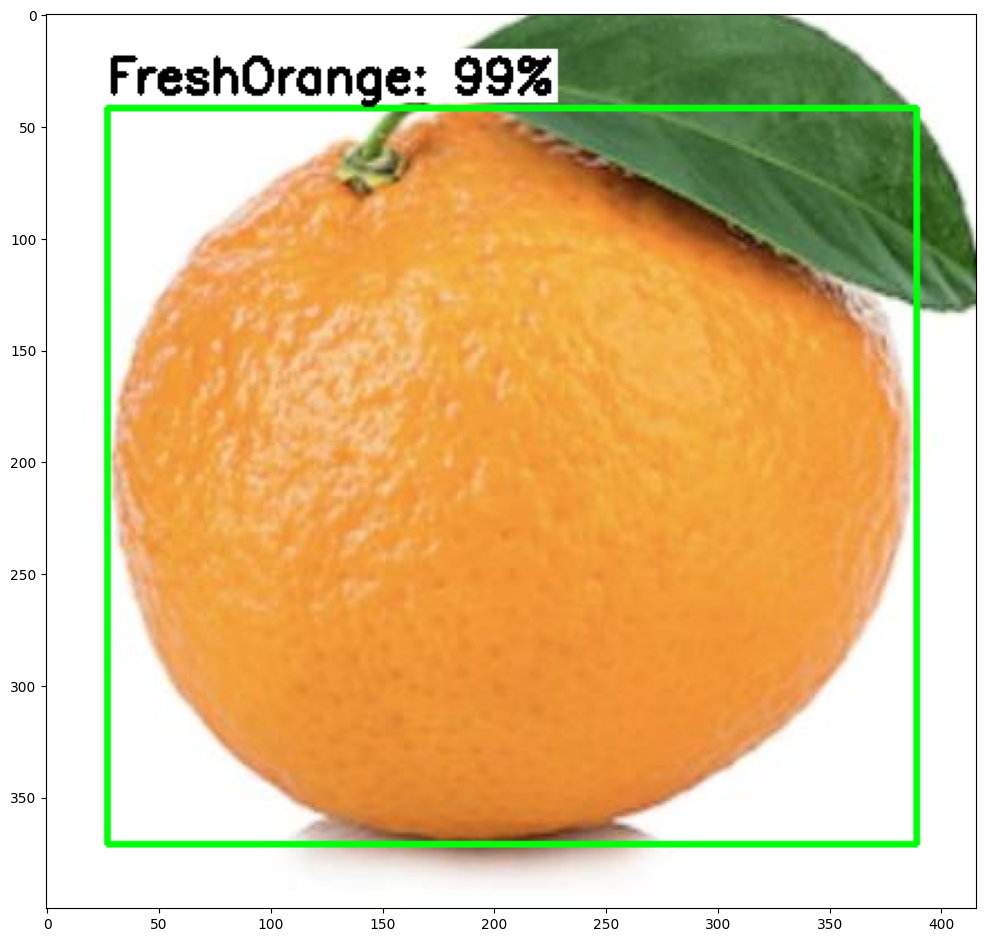

In [120]:
# Set up variables for running user's model
PATH_TO_IMAGES='/home/jupyter/images/test'   # Path to test images folder
PATH_TO_MODEL='/home/jupyter/custom_model_lite/detect.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/home/jupyter/labelmap.txt'   # Path to labelmap.txt file
min_conf_threshold=0.8 # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test = 10  # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

In [110]:
%%bash
git clone https://github.com/Cartucho/mAP /home/jupyter/mAP
cd /home/jupyter/mAP
rm input/detection-results/*
rm input/ground-truth/*
rm input/images-optional/*
wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/calculate_map_cartucho.py

fatal: destination path '/home/jupyter/mAP' already exists and is not an empty directory.
rm: cannot remove 'input/ground-truth/backup': Is a directory
--2023-11-30 07:48:27--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/calculate_map_cartucho.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5397 (5.3K) [text/plain]
Saving to: ‘calculate_map_cartucho.py.1’

     0K .....                                                 100% 73.0M=0s

2023-11-30 07:48:27 (73.0 MB/s) - ‘calculate_map_cartucho.py.1’ saved [5397/5397]



In [111]:
!cp /home/jupyter/images/test/* /home/jupyter/mAP/input/images-optional # Copy images and xml files
!mv /home/jupyter/mAP/input/images-optional/*.xml /home/jupyter/mAP/input/ground-truth/  # Move xml files to the appropriate folder

In [112]:
!python /home/jupyter/mAP/scripts/extra/convert_gt_xml.py

Conversion completed!


In [113]:
# Set up variables for running inference, this time to get detection results saved as .txt files
PATH_TO_IMAGES='/home/jupyter/images/test'   # Path to test images folder
PATH_TO_MODEL='/home/jupyter/custom_model_lite/detect.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/home/jupyter/labelmap.txt'   # Path to labelmap.txt file
PATH_TO_RESULTS='/home/jupyter/mAP/input/detection-results' # Folder to save detection results in
min_conf_threshold=0.1   # Confidence threshold

# Use all the images in the test folder
image_list = glob.glob(PATH_TO_IMAGES + '/*.jpg') + glob.glob(PATH_TO_IMAGES + '/*.JPG') + glob.glob(PATH_TO_IMAGES + '/*.png') + glob.glob(PATH_TO_IMAGES + '/*.bmp')
images_to_test = min(500, len(image_list)) # If there are more than 500 images in the folder, just use 500

# Tell function to just save results and not display images
txt_only = True

# Run inferencing function!
print('Starting inference on %d images...' % images_to_test)
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test, PATH_TO_RESULTS, txt_only)
print('Finished inferencing!')

Starting inference on 290 images...
Finished inferencing!


In [115]:
%cd /home/jupyter/mAP
!python calculate_map_cartucho.py --labels=/home/jupyter/labelmap.txt

/home/jupyter/mAP
Calculating mAP at 0.50 IoU threshold...
80.93% = FreshApple AP 
79.32% = FreshBanana AP 
47.87% = FreshCabbage AP 
44.67% = FreshCarrot AP 
99.44% = FreshMeat AP 
74.55% = FreshOrange AP 
75.65% = FreshStrawberry AP 
99.78% = RottenApple AP 
75.47% = RottenBanana AP 
28.70% = RottenCabbage AP 
62.88% = RottenCarrot AP 
100.00% = RottenMeat AP 
99.38% = RottenOrange AP 
74.27% = RottenStrawberry AP 
mAP = 74.49%
Calculating mAP at 0.55 IoU threshold...
80.93% = FreshApple AP 
75.40% = FreshBanana AP 
47.16% = FreshCabbage AP 
43.52% = FreshCarrot AP 
99.44% = FreshMeat AP 
71.37% = FreshOrange AP 
74.41% = FreshStrawberry AP 
99.78% = RottenApple AP 
59.41% = RottenBanana AP 
28.70% = RottenCabbage AP 
59.97% = RottenCarrot AP 
100.00% = RottenMeat AP 
99.38% = RottenOrange AP 
74.27% = RottenStrawberry AP 
mAP = 72.41%
Calculating mAP at 0.60 IoU threshold...
80.93% = FreshApple AP 
75.32% = FreshBanana AP 
40.56% = FreshCabbage AP 
43.52% = FreshCarrot AP 
94.44% = 

In [116]:
# Move labelmap and pipeline config files into TFLite model folder and zip it up
!cp /home/jupyter/labelmap.txt /home/jupyter/custom_model_lite
!cp /home/jupyter/labelmap.pbtxt /home/jupyter/custom_model_lite
!cp /home/jupyter/models/mymodel/pipeline_file.config /home/jupyter/custom_model_lite
%cd /home/jupyter
!zip -r custom_model_lite.zip custom_model_lite

/home/jupyter
updating: custom_model_lite/ (stored 0%)
updating: custom_model_lite/pipeline_file.config (deflated 65%)
updating: custom_model_lite/saved_model/ (stored 0%)
updating: custom_model_lite/saved_model/assets/ (stored 0%)
updating: custom_model_lite/saved_model/saved_model.pb (deflated 91%)
updating: custom_model_lite/saved_model/variables/ (stored 0%)
updating: custom_model_lite/saved_model/variables/variables.index (deflated 78%)
updating: custom_model_lite/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
updating: custom_model_lite/detect.tflite (deflated 9%)
updating: custom_model_lite/labelmap.pbtxt (deflated 75%)
updating: custom_model_lite/labelmap.txt (deflated 53%)


In [117]:
!ls -l /home/jupyter/

total 134592
-rw-r--r--  1 jupyter jupyter 59048725 Nov 28 11:56 FreshandRottenFoods.zip
-rw-r--r--  1 jupyter jupyter  8674654 Nov 30 07:53 TFLite_Models_Edival.ipynb
-rw-r--r--  1 jupyter jupyter     1414 Nov 28 12:20 create_csv.py
-rw-r--r--  1 jupyter jupyter     4414 Nov 28 12:19 create_tfrecord.py
drwxr-xr-x  3 jupyter jupyter     4096 Nov 28 21:05 custom_model_lite
-rw-r--r--  1 jupyter jupyter 20857430 Nov 30 08:00 custom_model_lite.zip
drwxr-xr-x  6 jupyter jupyter     4096 Nov 28 12:53 images
-rw-r--r--  1 jupyter jupyter      681 Nov 28 12:54 labelmap.pbtxt
-rw-r--r--  1 jupyter jupyter      197 Nov 28 12:54 labelmap.txt
drwxr-xr-x  8 jupyter jupyter     4096 Nov 30 07:59 mAP
drwxr-xr-x 11 jupyter jupyter     4096 Nov 28 12:56 models
drwxr-xr-x  5 jupyter jupyter     4096 Nov 29 01:09 src
-rw-r--r--  1 jupyter jupyter 43782531 Nov 28 12:54 train.tfrecord
-rw-r--r--  1 jupyter jupyter     2829 Nov 28 12:15 train_val_test_split.py
drwxr-xr-x  3 jupyter jupyter     4096 Nov 29 